<a href="https://colab.research.google.com/github/martinpius/tf_keras_training_loop_from_scratch/blob/main/Training_tf_keras_model_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading the google drive
from google.colab import drive
try:
  drive.mount("/content/drive", force_remount = True)
  COLAB = True
  import tensorflow as tf
  print(f"You are using colab with tensorflow version: {tf.__version__}")
except Exception as e:
  COLAB = False
  print("...Load your drive....")

def mytimefmt(t):
  hours = int(t/ (60 * 60))
  minutes = int(t % (60 * 60)/60)
  seconds = int(t % 60)
  return f"{hours}: {minutes:>03}: {seconds:05.2f}"

Mounted at /content/drive
You are using colab with tensorflow version: 2.3.0


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


In [5]:
#synthetic data generation
w0 = 5.6
b0 = 1.5
x_real = tf.random.normal(shape = [10000])
noise = tf.random.normal(shape = [10000])
out = x_real * w0 + b_real + noise #Create a simple relationship between the input-output

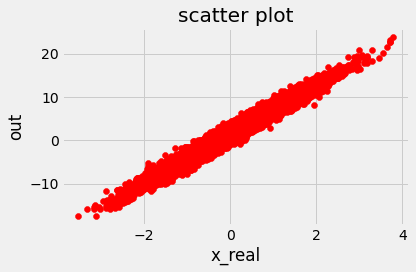

In [7]:
#Simple plot to visualize the data above:
plt.style.use('fivethirtyeight')
plt.scatter(x_real, out, color = 'red')
plt.title('scatter plot')
plt.xlabel('x_real')
plt.ylabel('out')
plt.tight_layout()

In [8]:
#There is a kind of linear relationship between the variables.
#We may try to fit a straight line to the data using tf.model/keras model as follow


In [9]:
#With tf model
class TModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.w = tf.Variable(4.5, name = 'w') #Any random initial weight is okay
    self.b = tf.Variable(0.0, name = 'b')#Biases are normally initialized to zeros
  def __call__(self, inputs):
    return self.w * inputs + self.b

mymodel = TModel()
display(mymodel(6.0))#check if its gives the desired results

<tf.Tensor: shape=(), dtype=float32, numpy=27.0>

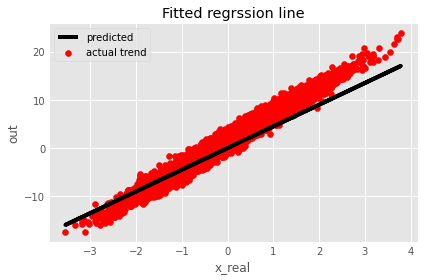

In [11]:
#We can try to fit a straight line using the above model as follow
plt.style.use('ggplot')
plt.scatter(x_real, out, color = 'red', label = 'actual trend')
plt.plot(x_real, mymodel(x_real), color = 'black', label = 'predicted')
plt.xlabel('x_real')
plt.ylabel('out')
plt.title("Fitted regrssion line")
plt.tight_layout()
plt.legend()


In [19]:
#We see that our straight line for untrained model underfit the data for high values
#Lets obtain its penalty (loss)
#For linear regression we obtain the parameters by minimizing l2 norm
def myloss(y_real, y_pred):
  return tf.reduce_mean(tf.square(y_real-y_pred))

In [20]:
print(f"Loss for untrained model: {myloss(out, mymodel(x_real))}")

Loss for untrained model: 4.540841579437256


In [21]:
#We can now enter the training stage of our model by following below path
#Get loss-Get slopes-optimize 


In [22]:
def train_fn(model, x_real, out, lr):
  with tf.GradientTape() as tape:
     # To compute slope by automatic differential power of tensorflow
     loss = myloss(out, mymodel(x_real))
  dw, db = tape.gradient(loss, [mymodel.w, mymodel.b])
  #Optimize the weights
  mymodel.w.assign_sub(lr*dw)
  mymodel.b.assign_sub(lr*db)
  return (dw, db, loss)



In [23]:
train_fn(mymodel, x_real, out,0.1) #Check the function if its real work

(<tf.Tensor: shape=(), dtype=float32, numpy=-2.253619>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-3.0194054>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.5408416>)

In [31]:
#The training loop
mymodel = TModel()
W1,b1 = [], [] #Store the weights for future uses
def mytrain_loop(model, x_real, out):
  for epoch in range(15):
    train_fn(model, x_real, out, 0.1)
    los_cur = myloss(out, mymodel(x_real))
    W1.append(mymodel.w.numpy())
    b1.append(mymodel.b.numpy())
    print(f"w: {W1[-1]}\nb: {b1}\ncurrent loss :{los_cur}")
  print(f"w: {mymodel.w}\nb: {mymodel.b}\nloss: {myloss(out, mymodel(x_real))}")


In [32]:
#Train the model by calling the above function
mytrain_loop(mymodel, x_real, out)


w: 4.7253618240356445
b: [0.30194053]
current loss :3.264195442199707
w: 4.904845237731934
b: [0.30194053, 0.54346025]
current loss :2.4498887062072754
w: 5.047789573669434
b: [0.30194053, 0.54346025, 0.73664993]
current loss :1.9304765462875366
w: 5.161633491516113
b: [0.30194053, 0.54346025, 0.73664993, 0.89118093]
current loss :1.5991586446762085
w: 5.252301216125488
b: [0.30194053, 0.54346025, 0.73664993, 0.89118093, 1.0147891]
current loss :1.387817621231079
w: 5.32451057434082
b: [0.30194053, 0.54346025, 0.73664993, 0.89118093, 1.0147891, 1.1136625]
current loss :1.2530049085617065
w: 5.382019519805908
b: [0.30194053, 0.54346025, 0.73664993, 0.89118093, 1.0147891, 1.1136625, 1.1927507]
current loss :1.167007327079773
w: 5.427820682525635
b: [0.30194053, 0.54346025, 0.73664993, 0.89118093, 1.0147891, 1.1136625, 1.1927507, 1.2560129]
current loss :1.112148404121399
w: 5.464297294616699
b: [0.30194053, 0.54346025, 0.73664993, 0.89118093, 1.0147891, 1.1136625, 1.1927507, 1.2560129, 1

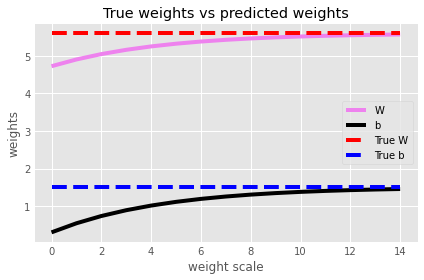

In [34]:
#Ploting the real weights vs predicted weights
plt.plot(range(15), W1, "violet",
         range(15), b1, "black")

plt.plot([w0] * len(range(15)), "r--",
         [b0] * len(range(15)), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.xlabel('weight scale')
plt.ylabel('weights')
plt.title('True weights vs predicted weights')
plt.tight_layout()
plt.show()

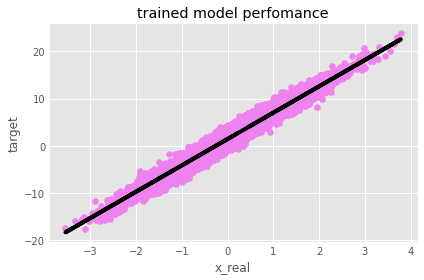

In [36]:
#Now we can vissualize how the trained model performs
plt.scatter(x_real, out, color = 'violet', label = 'scatter trend')
plt.plot(x_real, mymodel(x_real), color = 'black', label = 'fitted model')
plt.xlabel('x_real')
plt.ylabel('target')
plt.title('trained model perfomance')
plt.tight_layout()



In [37]:
#Getting the loss of the trained model
print(f"Loss after train: {myloss(out, mymodel(x_real))}")

Loss after train: 1.0196454524993896
